In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, KFold

In [66]:
df = pd.read_csv('MalwareData.csv', sep='|')
df.head(10)

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1
5,airappinstaller.exe,e6e5a0ab3b1a27127c5c4a29b237d823,332,224,258,9,0,512,46592,0,...,10,4.843545,2.718577,7.965023,3858.600000,104,14671,0,16,1
6,AcroBroker.exe,dd7d901720f71e7e4f5fb13ec973d8e9,332,224,290,9,0,222720,67072,0,...,7,3.892779,1.346314,5.232167,1629.142857,52,8648,72,16,1
7,AcroRd32.exe,540c61844ccd78c121c3ef48f3a34f0e,332,224,290,9,0,823808,650240,0,...,29,4.102636,1.664392,6.373890,11939.689655,94,270376,72,15,1
8,AcroRd32Info.exe,9afe3c62668f55b8433cde602258236e,332,224,290,9,0,4096,7168,0,...,4,5.097499,3.435993,5.929812,616.500000,94,1164,72,15,1
9,AcroTextExtractor.exe,ba621a96e44f6558c08cf25b40cb1bd4,332,224,290,9,0,29696,12800,0,...,2,4.235788,3.456169,5.015407,820.000000,716,924,72,15,1


In [67]:
df = df.drop(columns=['Name', 'md5'])

In [68]:
# Check for na values
df.isna().sum()

Machine                        0
SizeOfOptionalHeader           0
Characteristics                0
MajorLinkerVersion             0
MinorLinkerVersion             0
SizeOfCode                     0
SizeOfInitializedData          0
SizeOfUninitializedData        0
AddressOfEntryPoint            0
BaseOfCode                     0
BaseOfData                     0
ImageBase                      0
SectionAlignment               0
FileAlignment                  0
MajorOperatingSystemVersion    0
MinorOperatingSystemVersion    0
MajorImageVersion              0
MinorImageVersion              0
MajorSubsystemVersion          0
MinorSubsystemVersion          0
SizeOfImage                    0
SizeOfHeaders                  0
CheckSum                       0
Subsystem                      0
DllCharacteristics             0
SizeOfStackReserve             0
SizeOfStackCommit              0
SizeOfHeapReserve              0
SizeOfHeapCommit               0
LoaderFlags                    0
NumberOfRv

In [69]:
# Check unique values if any column has only 1
for c in df.columns:
    print(c + ": {} unique values".format(len(df[c].unique())))

Machine: 3 unique values
SizeOfOptionalHeader: 5 unique values
Characteristics: 104 unique values
MajorLinkerVersion: 41 unique values
MinorLinkerVersion: 62 unique values
SizeOfCode: 3809 unique values
SizeOfInitializedData: 3217 unique values
SizeOfUninitializedData: 441 unique values
AddressOfEntryPoint: 23110 unique values
BaseOfCode: 385 unique values
BaseOfData: 1106 unique values
ImageBase: 9099 unique values
SectionAlignment: 12 unique values
FileAlignment: 9 unique values
MajorOperatingSystemVersion: 12 unique values
MinorOperatingSystemVersion: 12 unique values
MajorImageVersion: 38 unique values
MinorImageVersion: 70 unique values
MajorSubsystemVersion: 6 unique values
MinorSubsystemVersion: 10 unique values
SizeOfImage: 2312 unique values
SizeOfHeaders: 30 unique values
CheckSum: 81633 unique values
Subsystem: 4 unique values
DllCharacteristics: 74 unique values
SizeOfStackReserve: 40 unique values
SizeOfStackCommit: 40 unique values
SizeOfHeapReserve: 30 unique values
Size

In [70]:
# Separate features and target variable
X = df.drop(columns=['legitimate'])

# standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y = df['legitimate']

In [71]:
def run_model(model_type, model, X, y):
    print(model_type, "classifier:")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)    # Fit the classifier
    
    start_time_train = time.time()  # Start time

    model.fit(X_train, y_train)
    
    end_time_train = time.time()  # End time
    time_taken_train = end_time_train - start_time_train  # Time taken to run the code

    print(f"Time taken to train the {model_type} model: {time_taken_train} seconds")
    
    # Make predictions
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy:", acc)
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()
    # print(classification_report(y_test,y_pred))
    
    #K-Fold validation 
    start_time_cv = time.time()  # Start time
    num_folds = 5
    
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    
    cv_scores = cross_val_score(model, X, y, cv=kf)
    
    end_time_cv = time.time()  # End time
    time_taken_cv = end_time_cv - start_time_cv  # Time taken to run the code

    print(f"Time taken to cross-validate the {model_type} model: {time_taken_cv} seconds")
    print("Cross-validation scores:", cv_scores)
    print("Mean CV accuracy:", cv_scores.mean())
    print("Standard deviation of CV accuracy:", cv_scores.std())

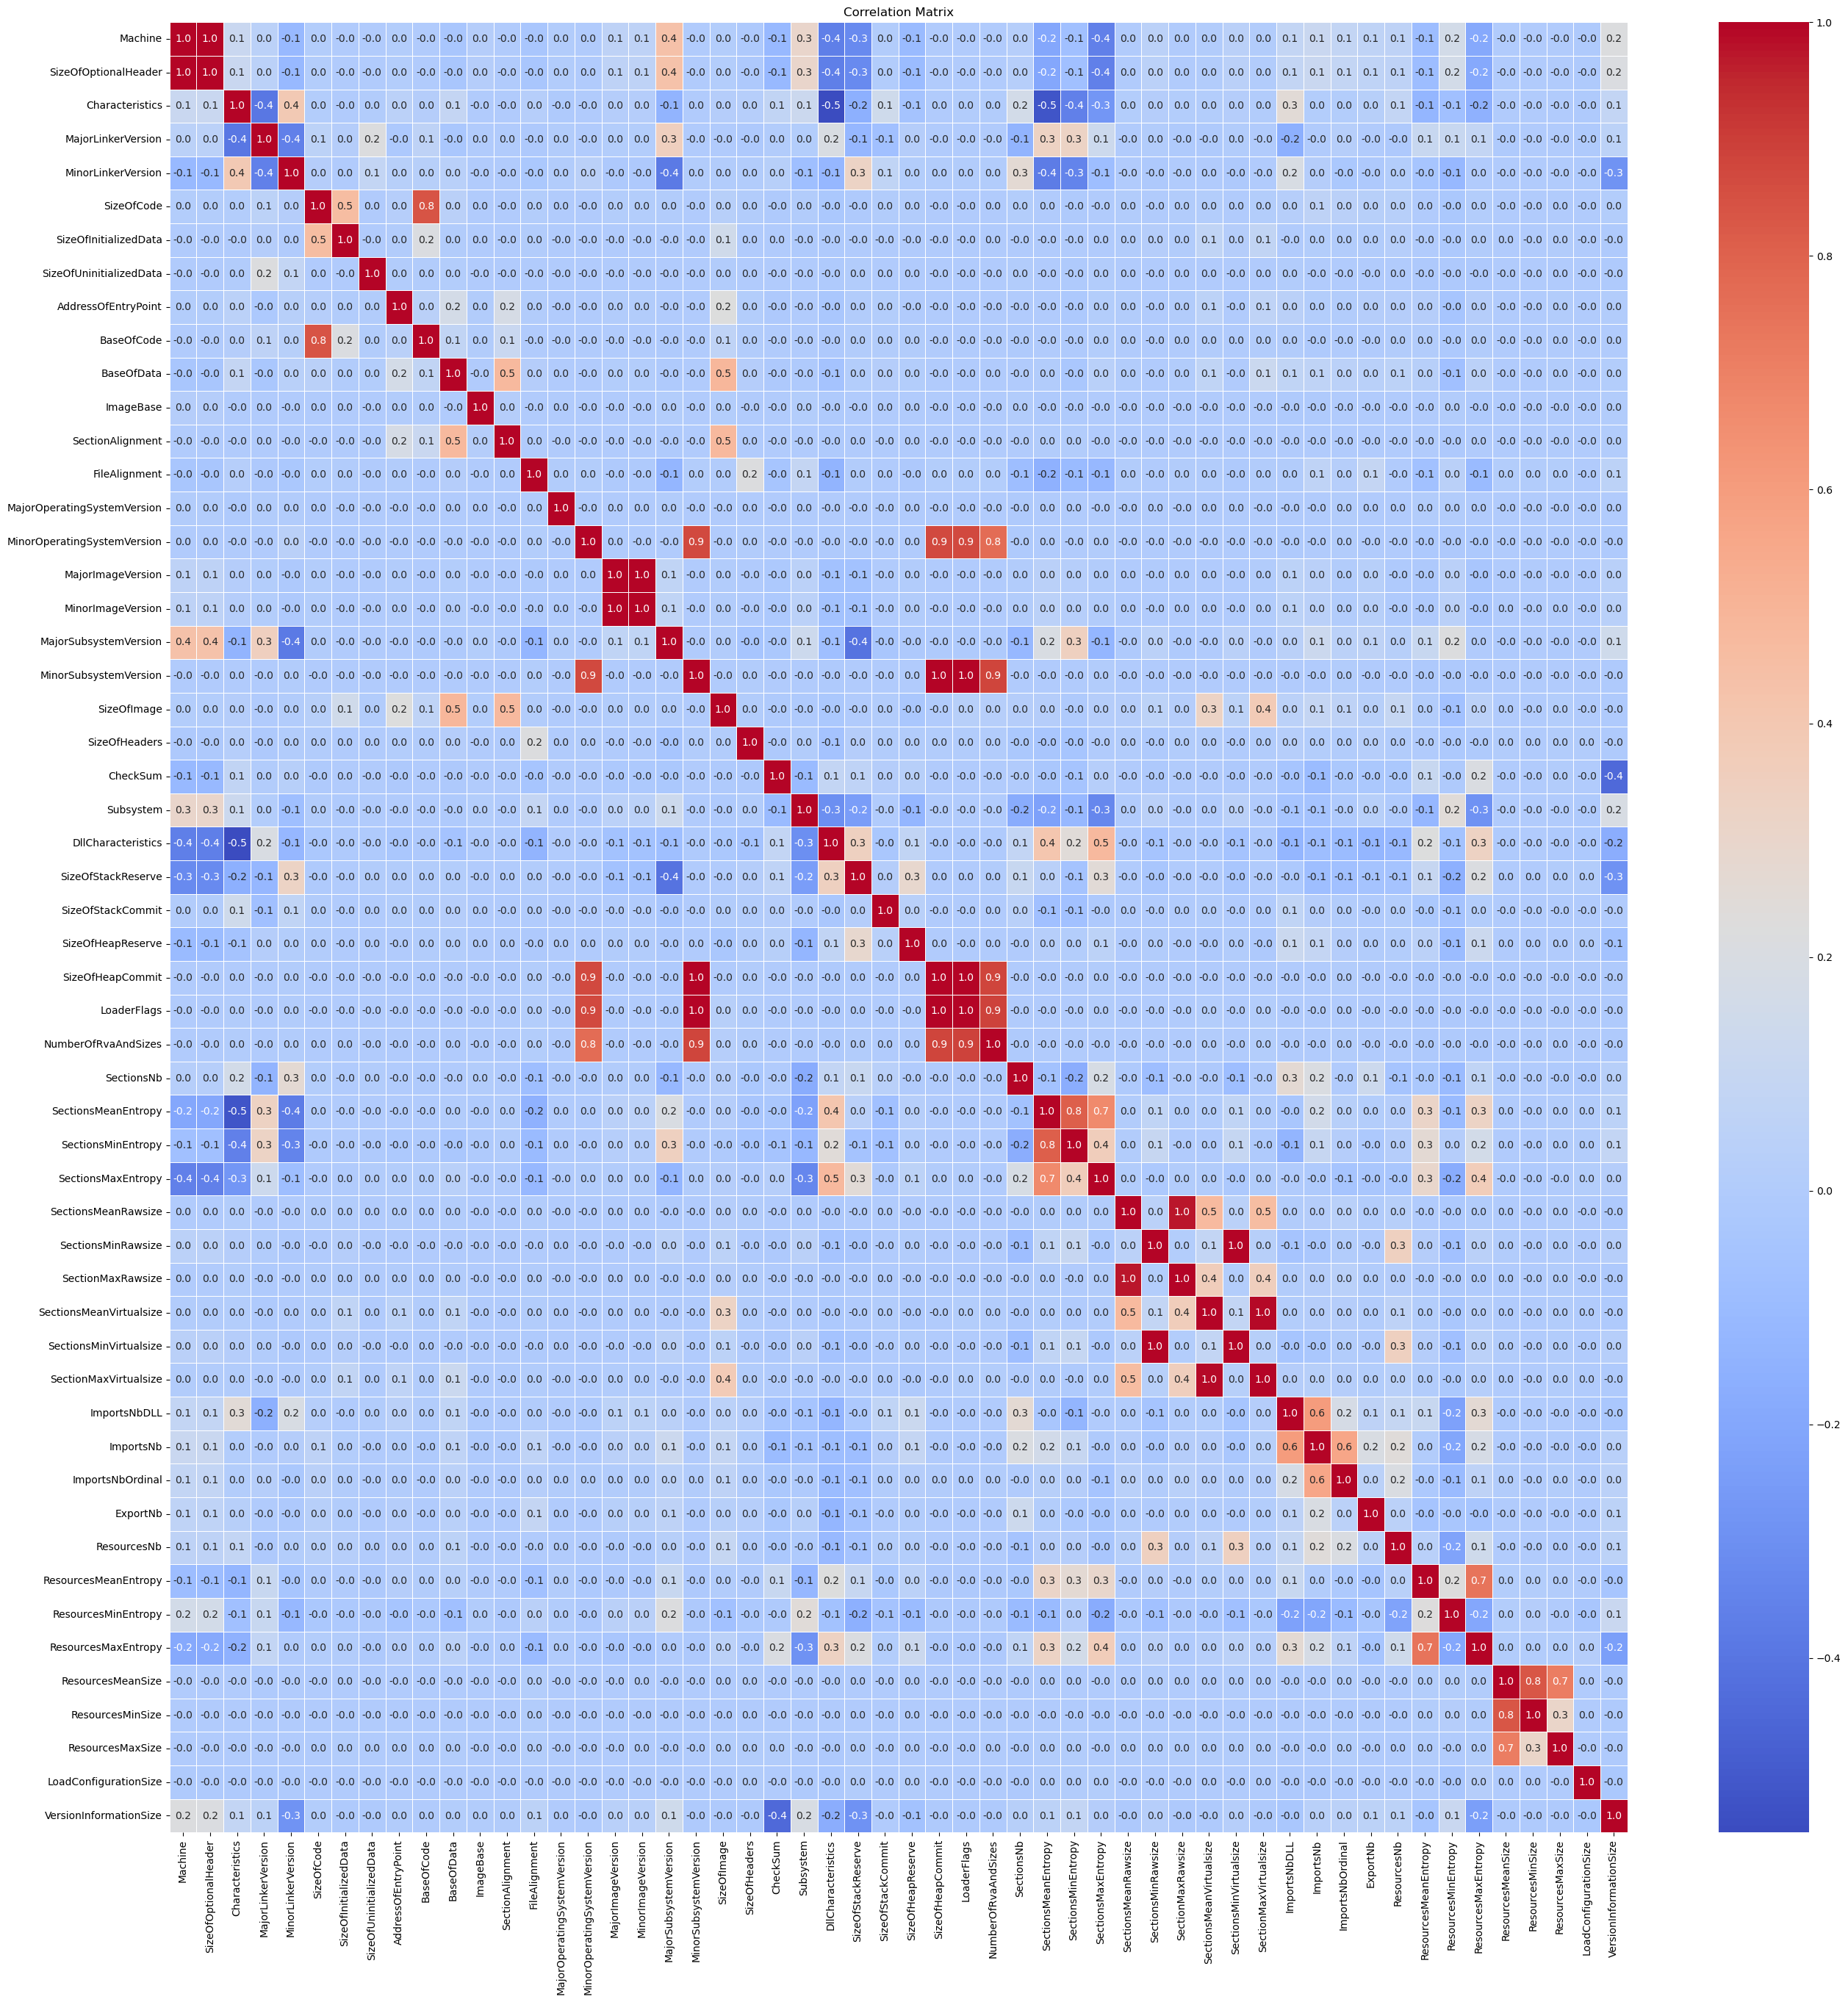

In [72]:
correlation_matrix = X.corr()
# Set up the figure size
f, ax = plt.subplots(figsize=(32, 32))
# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidth=.5, ax=ax, fmt='.1f')
# Set the title and show the plot
plt.title('Correlation Matrix')
plt.show()

36

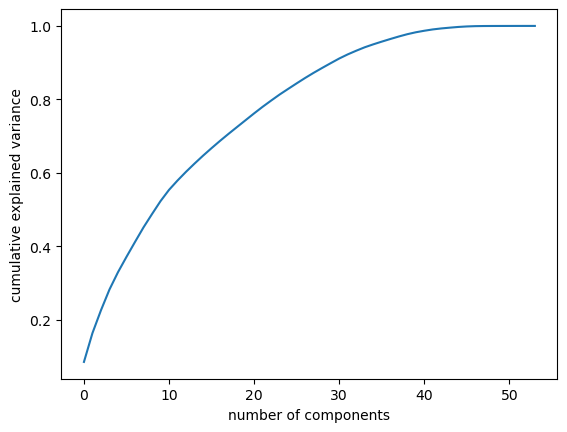

In [73]:
pca = PCA()
pca.fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1

In [74]:
pca_lr = PCA(n_components=36)
X_pca = pca_lr.fit_transform(X_scaled)

Logistic Regression classifier:
Time taken to train the Logistic Regression model: 0.6046674251556396 seconds
Accuracy: 0.97743571169866


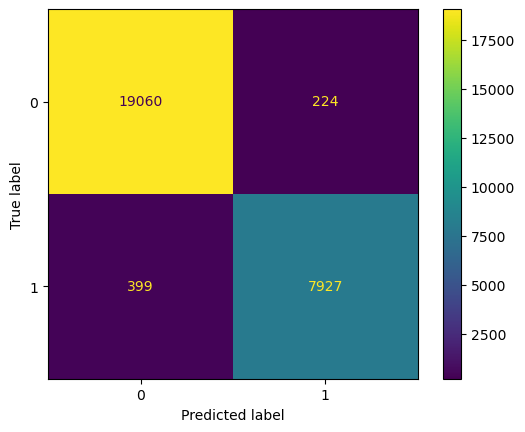

Time taken to cross-validate the Logistic Regression model: 2.576939344406128 seconds
Cross-validation scores: [0.97935531 0.97783412 0.97732623 0.97754355 0.97765221]
Mean CV accuracy: 0.9779422855632285
Standard deviation of CV accuracy: 0.000725392824097446


In [75]:
lr_model = LogisticRegression(random_state=42, max_iter=1000)
run_model('Logistic Regression', lr_model, X_pca, y)

(138047, 15)
['Machine' 'SizeOfOptionalHeader' 'Characteristics'
 'MajorSubsystemVersion' 'CheckSum' 'Subsystem' 'DllCharacteristics'
 'SizeOfStackReserve' 'SectionsNb' 'SectionsMeanEntropy'
 'SectionsMaxEntropy' 'ResourcesMeanEntropy' 'ResourcesMinEntropy'
 'ResourcesMaxEntropy' 'VersionInformationSize']
Random Forest classifier:
Time taken to train the Random Forest model: 12.346432209014893 seconds
Accuracy: 0.9944947482796088


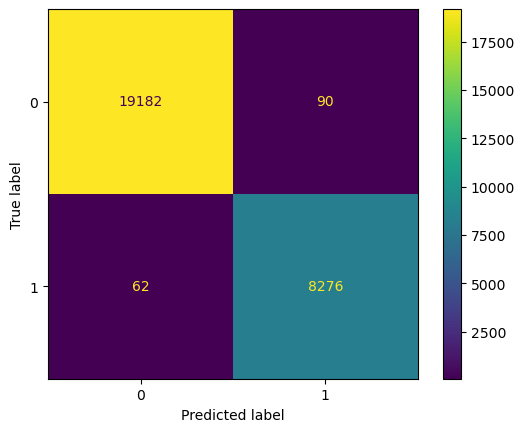

Time taken to cross-validate the Random Forest model: 63.54351568222046 seconds
Cross-validation scores: [0.99482072 0.99482072 0.99424101 0.99467565 0.99409613]
Mean CV accuracy: 0.994530843989755
Standard deviation of CV accuracy: 0.0003039750167496853


In [76]:
selector_uv = SelectKBest(f_classif, k=15)
X_uv = selector_uv.fit_transform(X_scaled, y)
print(X_uv.shape)
print(selector_uv.get_feature_names_out(input_features=df.columns[:-1]))
rf_uv = RandomForestClassifier(random_state=42)
run_model('Random Forest', rf_uv, X_uv, y)

In [77]:
model_rfe = RandomForestClassifier(random_state=42)
selector_rfe = RFE(model_rfe, n_features_to_select=15)
selector_rfe = selector_rfe.fit(X_scaled, y)

In [80]:
selector_rfe.get_feature_names_out(input_features=df.columns[:-1])

array(['Characteristics', 'MajorLinkerVersion', 'BaseOfData',
       'MajorOperatingSystemVersion', 'MinorImageVersion', 'CheckSum',
       'Subsystem', 'DllCharacteristics', 'SizeOfStackReserve',
       'SectionsMinEntropy', 'SectionsMaxEntropy', 'ExportNb',
       'ResourcesMinEntropy', 'ResourcesMinSize',
       'VersionInformationSize'], dtype=object)

(138047, 15)
Random Forest classifier:
Time taken to train the Random Forest model: 9.89881420135498 seconds
Accuracy: 0.9948931546541109


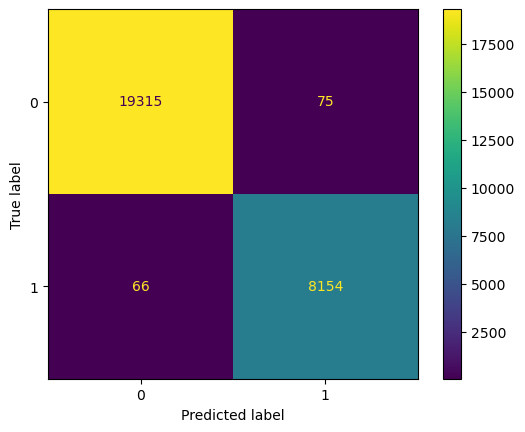

Time taken to cross-validate the Random Forest model: 50.33826041221619 seconds
Cross-validation scores: [0.99507425 0.99485694 0.99463943 0.99489297 0.99434967]
Mean CV accuracy: 0.9947626503590543
Standard deviation of CV accuracy: 0.0002484768282368231


In [81]:
X_rfe = selector_rfe.transform(X_scaled)
print(X_rfe.shape)
dt_rfe = RandomForestClassifier(random_state=42)
run_model('Random Forest', dt_rfe, X_rfe, y)

In [82]:
clf = ExtraTreesClassifier(random_state=42, max_features = 15).fit(X_scaled, y)
model = SelectFromModel(clf, prefit=True)
X_tb = model.transform(X_scaled)
print(X_tb.shape)

(138047, 13)


DllCharacteristics 0.15907354755272632
Characteristics 0.15258141911029596
Machine 0.10973424319912344
Subsystem 0.07481667404759096
VersionInformationSize 0.061003540405607286
SectionsMaxEntropy 0.057198461197395974
ResourcesMaxEntropy 0.04983110197834649
SizeOfOptionalHeader 0.04402455098774323
MajorSubsystemVersion 0.039474060651628284
SizeOfStackReserve 0.03306788017674945
ResourcesMinEntropy 0.02464877950522009
MajorOperatingSystemVersion 0.023930283790095996
SectionsMinEntropy 0.018775827138216662


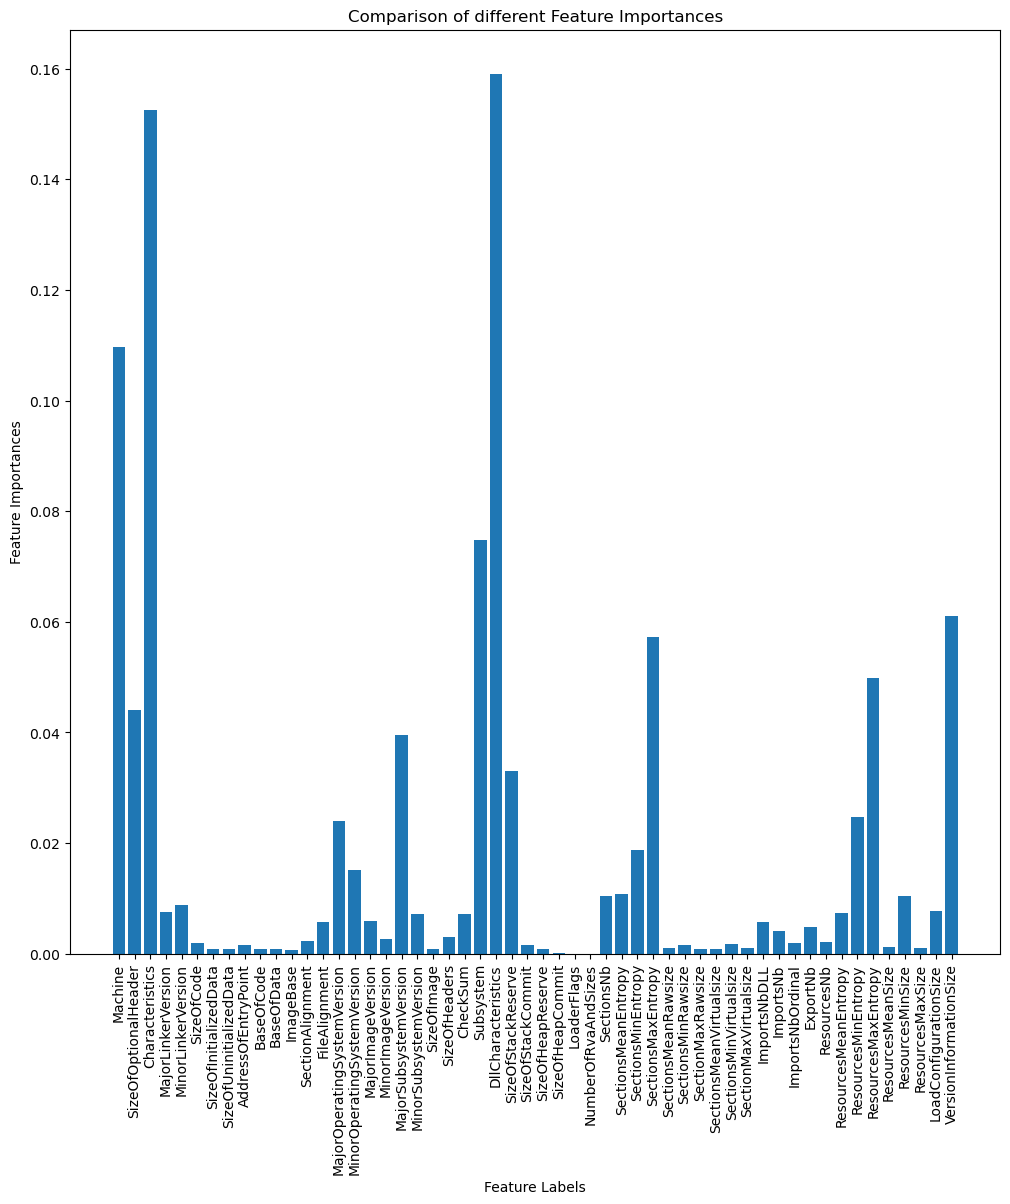

In [83]:
# See which columns are selected
cols = X_tb.shape[1]
inds = np.argsort(clf.feature_importances_)[::-1][:cols]
for i in range(cols):
    print(df.columns[inds[i]], clf.feature_importances_[inds[i]])

plt.figure(figsize=(12, 12))
plt.bar(X.columns, clf.feature_importances_)
plt.xticks(rotation=90)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

Random Forest classifier:
Time taken to train the Random Forest model: 9.413439750671387 seconds
Accuracy: 0.9941325606664252


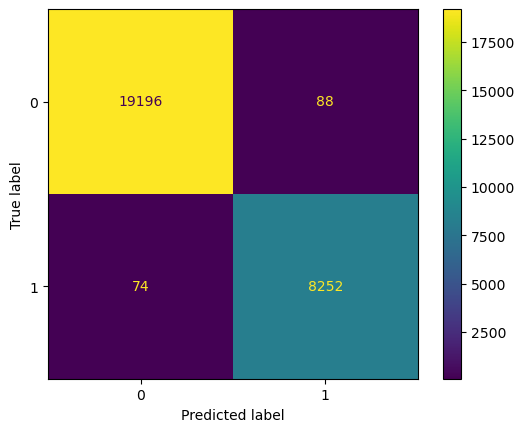

Time taken to cross-validate the Random Forest model: 47.25768041610718 seconds
Cross-validation scores: [0.99427744 0.99406012 0.99442211 0.99409613 0.99333551]
Mean CV accuracy: 0.9940382604400098
Standard deviation of CV accuracy: 0.0003747623274657082


In [85]:
rf_tb = RandomForestClassifier(random_state=42)
run_model('Random Forest', rf_tb, X_tb, y)

In [ ]:
# Train test split
#X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.20)

In [ ]:
#models = {}
#models['Logistic Regression'] = LogisticRegression(random_state=42)
#models['Decision Trees'] = DecisionTreeClassifier(random_state=42)
#models['Random Forest'] = RandomForestClassifier(random_state=42)
#models['K-Nearest Neighbor'] = KNeighborsClassifier(n_neighbors = 5)
#models['SVM'] = svm.SVC(kernel='linear')
#models['Gaussian Naive Bayes'] = GaussianNB()